In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fraud = pd.read_csv('Fraud_Data.csv')
df_ipad_country = pd.read_csv('IpAddress_to_Country.csv')

In [3]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
df_ipad_country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
df_ipad_country.lower_bound_ip_address = df_ipad_country.lower_bound_ip_address.astype(int)
df_ipad_country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China


In [9]:
def country_map(ip_ad):
    countries=df_ipad_country.loc[(df_ipad_country['upper_bound_ip_address'] >= ip_ad) & (df_ipad_country['lower_bound_ip_address'] <= ip_ad),'country'].values
    if len(countries)==0:
        return np.nan
    return countries[0]

In [10]:
df_fraud['country'] = df_fraud['ip_address'].apply(lambda row: country_map(row))

In [81]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_group
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,3
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,3


In [82]:
len(df_fraud.country.unique())

182

In [83]:
# How much country data are we missing ?
df_fraud.country.isna().sum()

0

In [84]:
df_fraud['country'].fillna('Unknown', inplace=True)
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_group
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,3
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,3


In [85]:
df_fraud['class'].isna().sum()

0

In [86]:
# Clean dataset by taking out id columns (user_id, device_id, ip_address)
df_clean = df_fraud.drop(['user_id','device_id','ip_address'],axis=1)
df_clean.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,class,country,purchase_group
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,SEO,Chrome,M,39,0,Japan,2
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,Ads,Chrome,F,53,0,United States,1
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,M,53,1,United States,1
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,M,41,0,Unknown,3
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,Ads,Safari,M,45,0,United States,3


In [87]:
# Clean dataset by changing sex data to binary
df_clean['sex'] = df_clean.apply(lambda x: 1 if x['sex']=='M' else 0,axis=1)
df_clean.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,class,country,purchase_group
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,SEO,Chrome,1,39,0,Japan,2
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,Ads,Chrome,0,53,0,United States,1
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,1,53,1,United States,1
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,1,41,0,Unknown,3
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,Ads,Safari,1,45,0,United States,3


In [88]:
# What is the percentage of fraud ?
fraud_percentage = len(df_fraud[df_fraud['class']==1])/len(df_fraud)*100

print('To be considered as useful, our model must have above %s%% accuracy' % str(round(100 - fraud_percentage,2)))

To be considered as useful, our model must have above 90.64% accuracy


In [89]:
# Since our target variable is a binary, we can try implementing a logistic regression model to try and predict who is frauding 
df_log_reg = df_clean.drop(['signup_time','purchase_time'],axis=1)
df_log_reg = pd.get_dummies(df_log_reg)

y = df_log_reg['class']
X = df_log_reg.drop(['class'],axis=1)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit_transform(X_train)
sc_x.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
# Checking what kind of score we get with a basic logistic regression

classifier.score(X_test, y_test)

0.906979309127807

In [94]:
print('This model only performs 0.05% better than always predicting that there is no fraud')

This model only performs 0.05% better than always predicting that there is no fraud


In [96]:
# Let's try to implement a logistic regression model with a new variable, time delta
# Should see how adding that new variable impacts the performance of our model(s)

df_clean['purchase_time'] = df_clean['purchase_time'].astype('datetime64[ns]')
df_clean['signup_time'] = df_clean['signup_time'].astype('datetime64[ns]')

df_clean_delta = df_clean
df_clean_delta['time_delta'] = (df_clean['purchase_time'] - df_clean['signup_time'])
df_clean_delta['time_delta'] = (df_clean['time_delta'].dt.total_seconds()).astype('int')
df_clean_delta.head()

df_log_reg_delta = df_clean_delta.drop(['signup_time','purchase_time'],axis=1)
df_log_reg_delta = pd.get_dummies(df_log_reg_delta)

y_delta = df_log_reg_delta['class']
X_delta = df_log_reg_delta.drop(['class'],axis=1)

In [97]:
X_train_delta, X_test_delta, y_train_delta, y_test_delta = train_test_split(X_delta, y_delta, test_size=0.3, random_state=42)

In [98]:
sc_x_delta = StandardScaler()
sc_x_delta.fit_transform(X_train_delta)
sc_x_delta.fit(X_test_delta)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
classifier_delta = LogisticRegression()
classifier_delta.fit(X_train_delta, y_train_delta)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
classifier_delta.score(X_test_delta, y_test_delta)

0.906979309127807

In [101]:
# The performance is still poor, let's try a random forest model
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_delta, y_train_delta)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
rf_classifier.score(X_test_delta, y_test_delta)

0.9555962412317466

In [121]:
y_pred = rf_classifier.predict(X_test_delta)

[[41033    84]
 [ 1929  2288]]


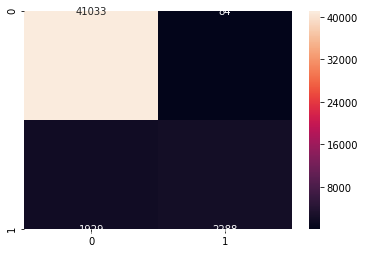

In [123]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_delta, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')

In [37]:
# Issue with SVM => we have too much data, this model takes too long to train

In [38]:
# Let's try out a SVM model, see what kind of score we get
from sklearn.svm import SVC

# sv_classifier = SVC()
# sv_classifier.fit(X_train_delta, y_train_delta)

In [39]:
# sv_classifier.score(X_test_delta, y_test_delta)

In [103]:
# Creating new column to classify transaction amounts
df_clean['purchase_group'] = pd.qcut(df_clean['purchase_value'], q=4, labels=[1, 2, 3, 4])
df_clean.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,class,country,purchase_group,time_delta
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,SEO,Chrome,1,39,0,Japan,2,4506682
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,Ads,Chrome,0,53,0,United States,1,17944
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,1,53,1,United States,1,1
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,1,41,0,Unknown,3,492085
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,Ads,Safari,1,45,0,United States,3,4361461


In [104]:
df_clean = df_clean.drop(['signup_time','purchase_time'],axis=1)
df_clean.head()

,purchase_value,source,browser,sex,age,class,country,purchase_group,time_delta
0,34,SEO,Chrome,1,39,0,Japan,2,4506682
1,16,Ads,Chrome,0,53,0,United States,1,17944
2,15,SEO,Opera,1,53,1,United States,1,1
3,44,SEO,Safari,1,41,0,Unknown,3,492085
4,39,Ads,Safari,1,45,0,United States,3,4361461


In [105]:
# X_clean_num = df_clean.drop(['source','browser','country'],axis=1)
# X_clean_cat = df_clean.drop(['purchase_value','sex','age','class','purchase_group','time_delta','time_delta_1'],axis=1)
# y = df_clean['class']

In [106]:
# X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_clean_num, X_clean_cat, y, test_size=0.3, stratify=y, random_state=42)

In [107]:
# sc_x_new = StandardScaler()
# sc_x_new.fit_transform(X_train_num)
# sc_x_new.fit(X_test)

In [108]:
df_clean_dummies = pd.get_dummies(df_clean)
df_clean_dummies.head()

,purchase_value,sex,age,class,time_delta,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,...,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,purchase_group_1,purchase_group_2,purchase_group_3,purchase_group_4
0,34,1,39,0,4506682,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,16,0,53,0,17944,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,15,1,53,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,1,41,0,492085,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,39,1,45,0,4361461,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
X_clean_new = df_clean_dummies.drop(['class'],axis=1)
y_clean_new = df_clean_dummies['class']

In [110]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean_new, y_clean_new, test_size=0.3, random_state=42, stratify=y)

In [111]:
sc_x_new = StandardScaler()
sc_x_new.fit_transform(X_train_clean)
sc_x_new.fit(X_test_clean)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [113]:
rf_classifier_clean = RandomForestClassifier()
rf_classifier_clean.fit(X_train_clean, y_train_clean)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
rf_classifier_clean.score(X_test_clean, y_test_clean)

0.9545594917721798

In [115]:
y_pred_rf1 = rf_classifier_clean.predict(X_test_clean)

[[40999    90]
 [ 1970  2275]]


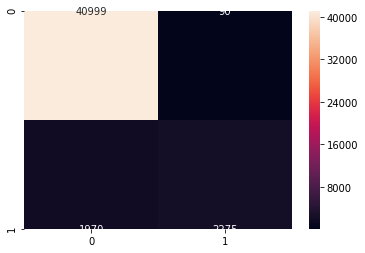

In [116]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_clean, y_pred_rf1)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')

[[38966  2151]
 [ 4020   197]]


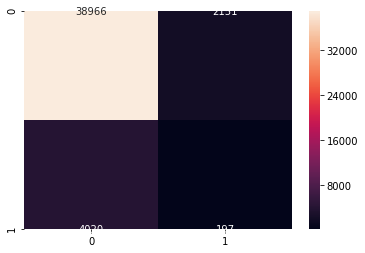

In [117]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test_delta, y_pred_rf)
print(cm1)
sns.heatmap(cm1, annot=True, fmt='d')